In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
df=pd.read_csv('/Users/sbilike/Desktop/DataScience2/HeartAttack/heartAttack.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Understading Data Set Columns

 It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

#age: The person's age in years
#sex: The person's sex (1 = male, 0 = female)
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol: The person's cholesterol measurement in mg/dl
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang: Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca: The number of major vessels (0-3)
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target: Heart disease (0 = no, 1 = yes)
To avoid HARKing (or Hypothesizing After the Results are Known) I'm going to take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

Diagnosis: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on 1, ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests 2.

Looking at information of heart disease risk factors led me to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking 3. According to another source 4, the major factors that can't be changed are: increasing age, male gender and heredity. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. Other factors include stress, alcohol and poor diet/nutrition.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is "...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries", it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

In [4]:
df.shape

(303, 14)

# Null Values visualization

<AxesSubplot:>

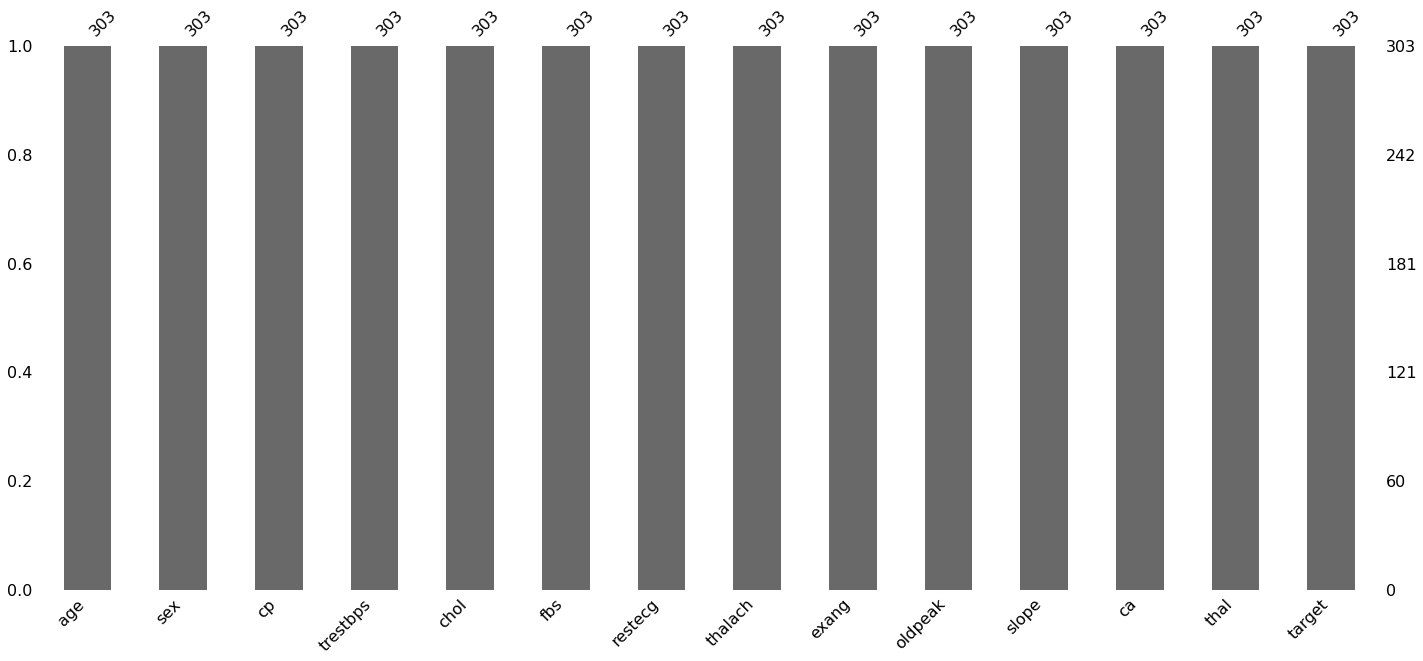

In [5]:
import missingno as msno
%matplotlib inline
msno.bar(df)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Describe

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Target column visualization

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

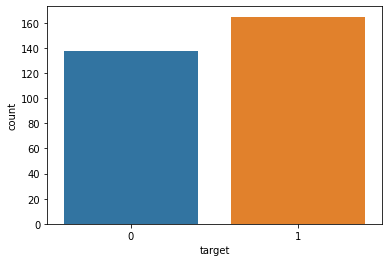

In [10]:
sns.countplot(x='target',data=df)

# Age Column

<AxesSubplot:xlabel='age', ylabel='count'>

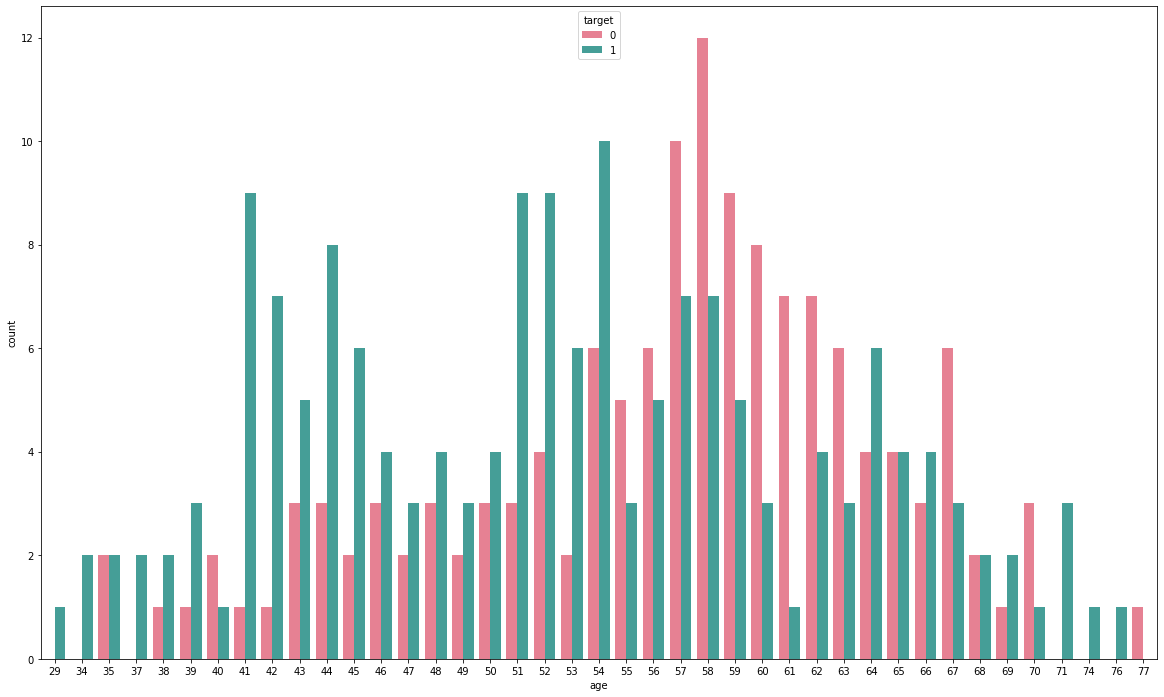

In [11]:
plt.figure(figsize=(20,12))
sns.countplot(data=df,x='age',hue='target',palette='husl')

# Sex Column

<AxesSubplot:xlabel='sex', ylabel='count'>

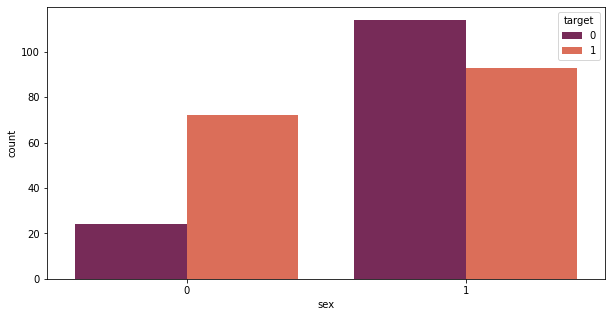

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='sex',hue='target',palette='rocket')

# Chest Pain (CP) column

In [13]:
df.cp.unique()

array([3, 2, 1, 0])

<AxesSubplot:xlabel='cp', ylabel='count'>

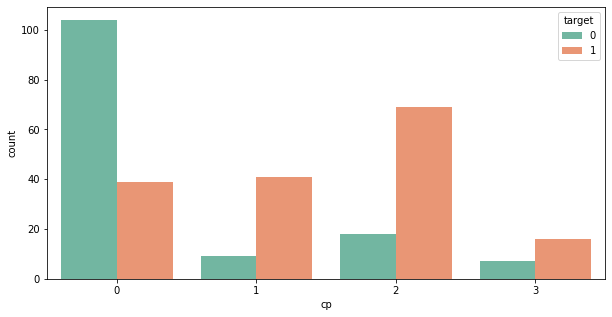

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cp',hue='target',palette='Set2')

# Blood Pressure (trestbps) column

In [15]:
df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<AxesSubplot:xlabel='trestbps', ylabel='count'>

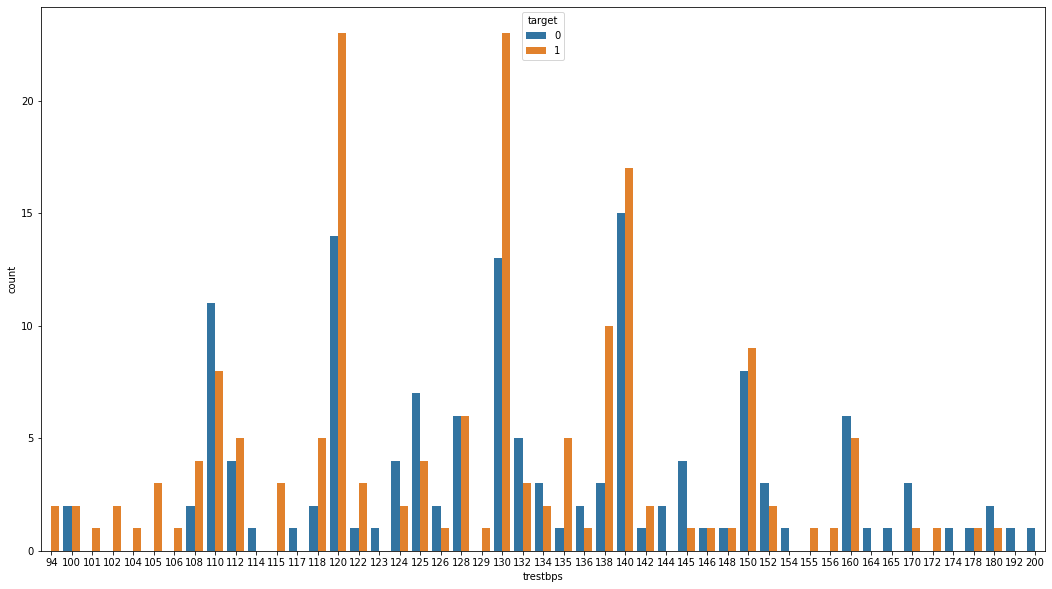

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(data=df,x='trestbps',hue='target')

# Blood Sugar(BP) column

In [17]:
df.fbs.unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='count'>

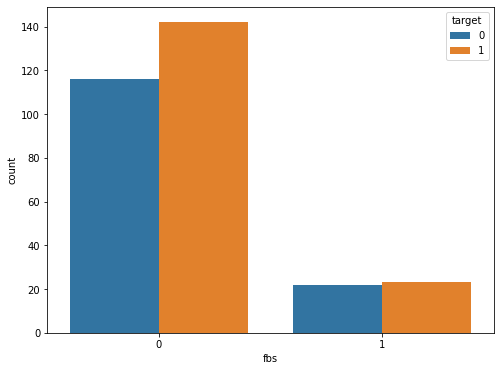

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='fbs',hue='target')

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Resting electrocardiographic measurement (restecg) column

In [20]:
df.restecg.unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='count'>

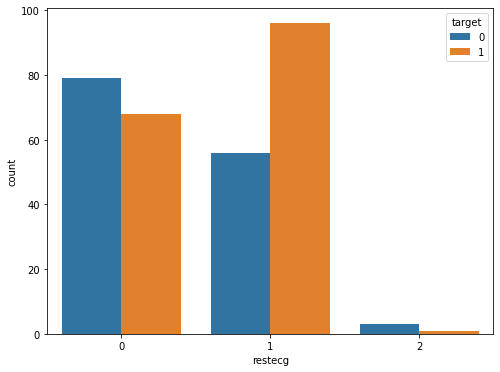

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='restecg',hue='target')

# Chi Square Test

In [22]:
from sklearn.feature_selection import chi2

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
chi_scores = chi2(X,y)

In [25]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [26]:
dropcols=p_values[p_values>0.05].index.tolist()
dropcols

['fbs', 'restecg']

In [27]:
df.drop(dropcols,axis=1,inplace=True)

# Feature Scaling

In [28]:
#from sklearn.preprocessing import StandardScaler
#StandardScaler = StandardScaler()  
#columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
#df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])
#df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

# Split Data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1),
    df['target'],
    test_size=0.2,
    random_state=47)

# LogisticRegression Model

In [30]:
from sklearn.linear_model import LogisticRegression 

In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score 
print ("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.8360655737704918


In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [34]:
model.score(X_test,y_test)

0.8360655737704918

In [35]:
model.score(X_train,y_train)

0.8553719008264463

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  7],
       [ 3, 30]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

